In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df=pd.read_csv('ev sales.csv')
df.head()

,State,Two_Wheeler,Three_Wheeler,Four_Wheeler,Goods_Vehicles,Public_Service_Vehicle,Special_Category_Vehicles,Ambulance/Hearses,Construction_Equipment_Vehicle,Other,Grand_Total
0,Andaman and Nicobar Island,1,30.0,81,NaN,40.0,NaN,NaN,NaN,7.0,159
1,Arunachal Pradesh,14,NaN,5,NaN,NaN,NaN,NaN,NaN,1.0,20
2,Assam,721,47041.0,161,7.0,15.0,NaN,NaN,NaN,2.0,47947
3,Bihar,5003,59079.0,114,11.0,26.0,NaN,NaN,NaN,8.0,64241
4,Chandigarh,298,1410.0,182,NaN,40.0,NaN,NaN,NaN,1.0,1931


In [108]:
df['State']=df['State'].replace('Dadra and Nagar Haveli and Daman and Diu','Dadra & N Haveli & Daman & Diu')

In [109]:
df.drop(df.index[32],axis=0,inplace=True)

In [110]:
df.describe()

,Two_Wheeler,Three_Wheeler,Four_Wheeler,Goods_Vehicles,Public_Service_Vehicle,Special_Category_Vehicles,Ambulance/Hearses,Construction_Equipment_Vehicle,Other,Grand_Total
count,32.000000,28.000000,32.00000,28.000000,24.000000,9.000000,5.000000,5.000000,28.000000,32.000000
mean,8829.437500,23113.785714,822.96875,108.428571,84.958333,45.555556,1.200000,79.400000,157.571429,30198.843750
std,15027.420445,52178.963264,1661.50339,305.682167,182.408638,112.373386,0.447214,161.695083,400.087993,54220.859227
min,1.000000,1.000000,2.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000
25%,68.500000,136.000000,13.75000,3.000000,9.500000,2.000000,1.000000,1.000000,3.750000,1323.000000
50%,1984.500000,3674.000000,131.50000,17.000000,31.000000,2.000000,1.000000,1.000000,19.000000,11156.500000
75%,10306.500000,19470.250000,638.50000,37.000000,43.250000,25.000000,1.000000,26.000000,65.000000,45205.000000
max,56737.000000,257159.000000,7212.00000,1281.000000,851.000000,344.000000,2.000000,368.000000,1602.000000,276217.000000


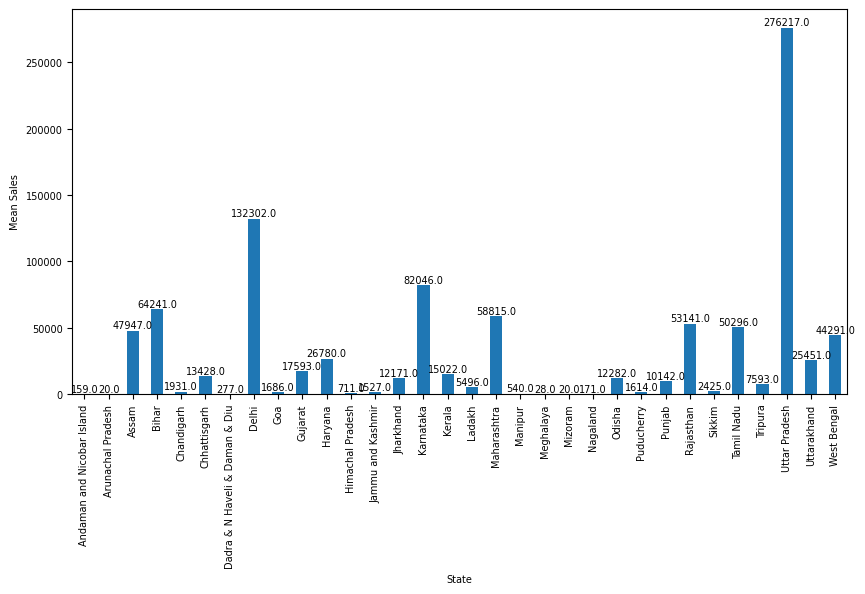

In [111]:
plt.figure(figsize=(10,5))
state_mean=df.groupby('State')['Grand_Total'].mean()
state_mean.plot.bar()
plt.ylabel("Mean Sales")
for i, value in enumerate(state_mean):
    plt.annotate(str(round(value, 2)), (i, value), ha='center', va='bottom')

plt.show()

In [112]:
df.drop(df[df['State']=='Grand Total'].index,inplace=True)
s2=df['Two_Wheeler'].tolist()
s3=df['Three_Wheeler'].tolist()
s4=df['Four_Wheeler'].tolist()
s5=df['Goods_Vehicles'].tolist()
s6=df['Public_Service_Vehicle'].tolist()
s7=df['Special_Category_Vehicles'].tolist()
s8=df['Ambulance/Hearses'].tolist()
s9=df['Construction_Equipment_Vehicle'].tolist()
s10=df['Other'].tolist()

C:\Users\Ayaan\AppData\Local\Temp\ipykernel_19236\1781430221.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)


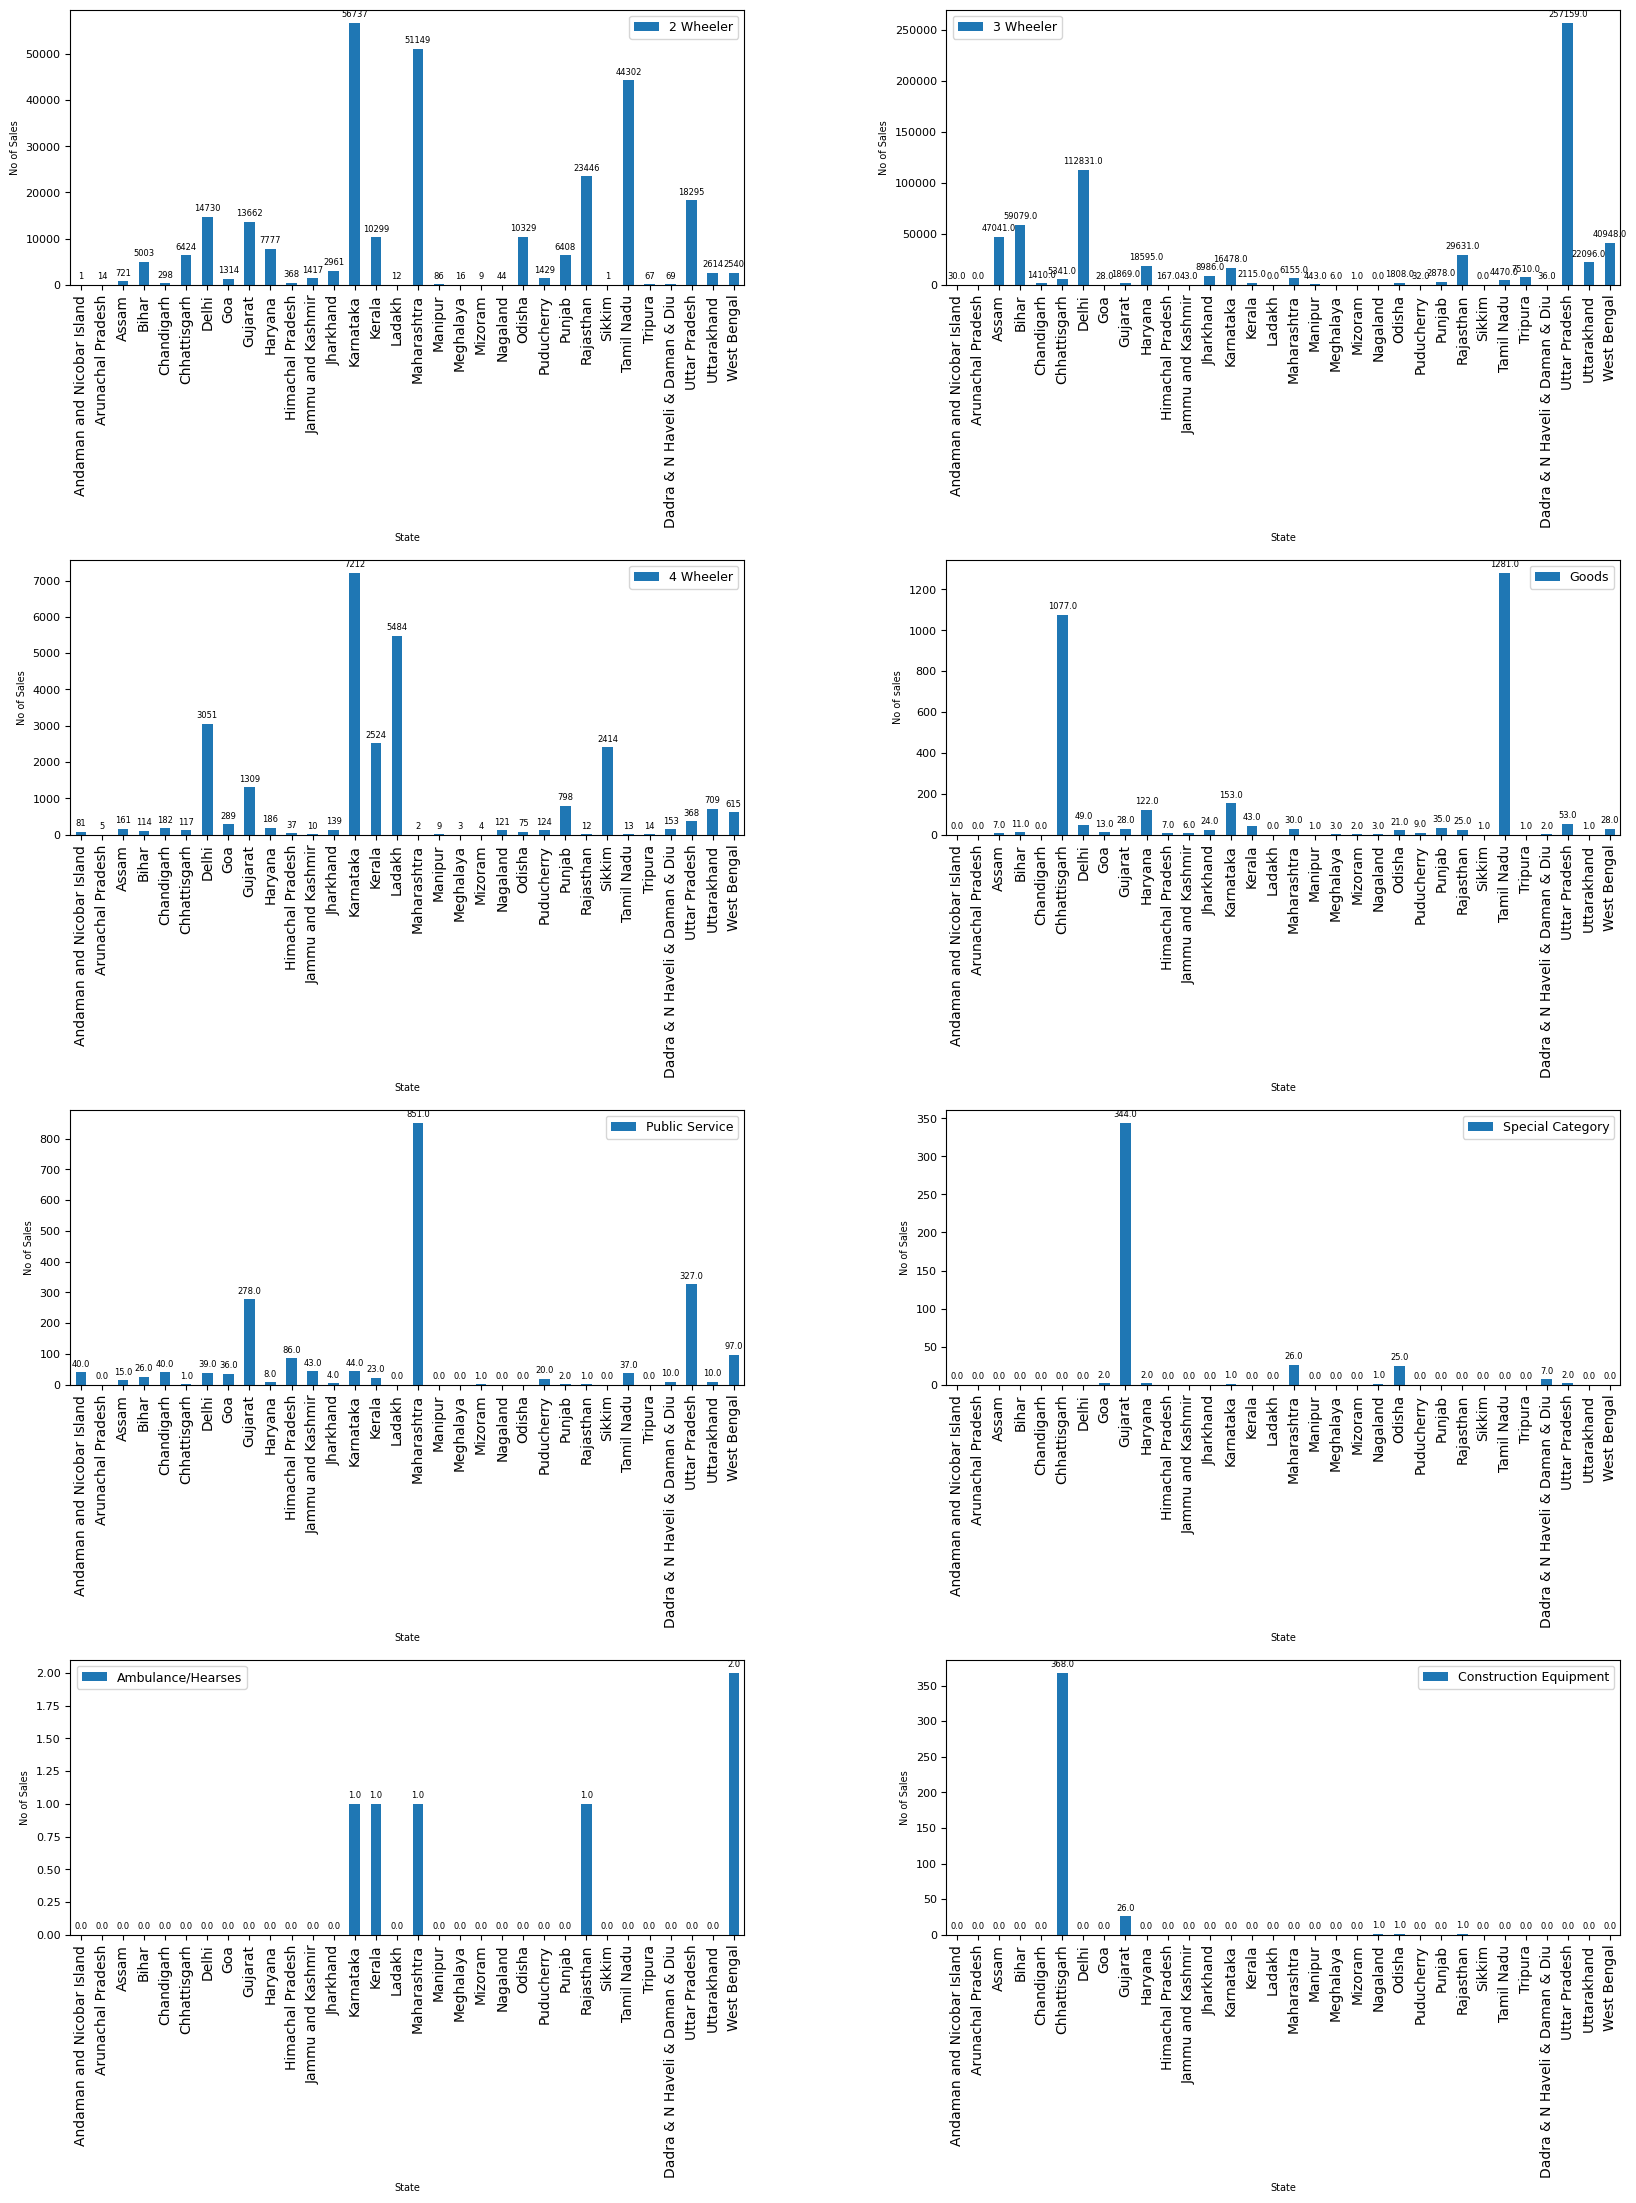

In [113]:
comparison=pd.DataFrame({'State':df['State'],'2 Wheeler':s2, '3 Wheeler':s3,'4 Wheeler':s4, 'Goods':s5,'Public Service':s6,'Special Category':s7,'Ambulance/Hearses':s8,'Construction Equipment':s9,'Other':s10})
comparison.set_index('State', inplace=True)
fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(20, 25))
plt.subplots_adjust(hspace=1,wspace=0.3)
plt.rcParams.update({'font.size':9})

comparison[['2 Wheeler']].plot.bar(ax=axes[0,0])
# axes[0,0].set_xlabel('State')
axes[0,0].set_ylabel('No of Sales')


comparison[['3 Wheeler']].plot.bar(ax=axes[0,1])
# axes[0,1].set_xlabel('State')
axes[0,1].set_ylabel('No of Sales')

comparison[['4 Wheeler']].plot.bar(ax=axes[1,0])
# axes[1,0].set_xlabel('State')
axes[1,0].set_ylabel('No of Sales')

comparison[['Goods']].plot.bar(ax=axes[1,1])
# axes[1,1].set_xlabel('State')
axes[1,1].set_ylabel('No of sales')

comparison[['Public Service']].plot.bar(ax=axes[2,0])
# axes[2,0].set_xlabel('State')
axes[2,0].set_ylabel('No of Sales')

comparison[['Special Category']].plot.bar(ax=axes[2,1])
# axes[2,1].set_xlabel('State')
axes[2,1].set_ylabel('No of Sales')

comparison[['Ambulance/Hearses']].plot.bar(ax=axes[3,0])
# axes[3,0].set_xlabel('State')
axes[3,0].set_ylabel('No of Sales')

comparison[['Construction Equipment']].plot.bar(ax=axes[3,1])
# axes[3,1].set_xlabel('State')
axes[3,1].set_ylabel('No of Sales')


for ax in axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
# comparison[['Other']].plot.bar(ax=axes[4,0])
# axes[4,0].set_xlabel('State')
# axes[4,0].set_ylabel('No of Sales')

for ax in axes.flatten():
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 6), textcoords='offset points', fontsize=6, color='black')

   

plt.show()

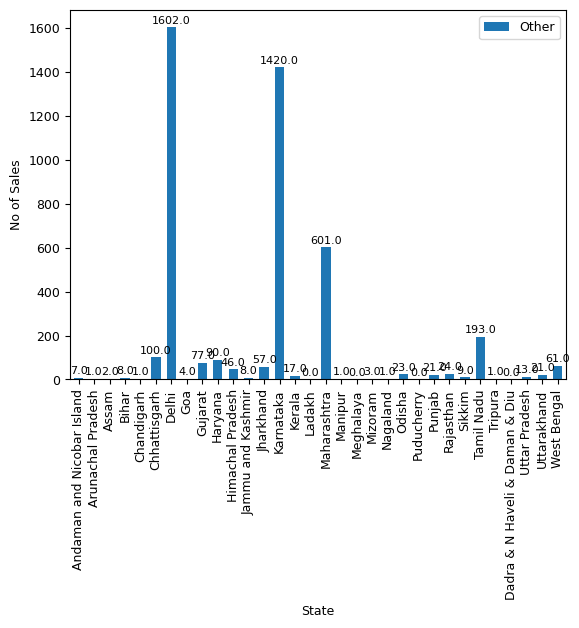

In [114]:
comparison=pd.DataFrame({'State':df['State'],'Other':s10})
comparison.set_index('State',inplace=True)
ax=comparison[['Other']].plot.bar(width=0.6)
plt.ylabel('No of Sales')
plt.xlabel('State')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8, color='black')
plt.show()

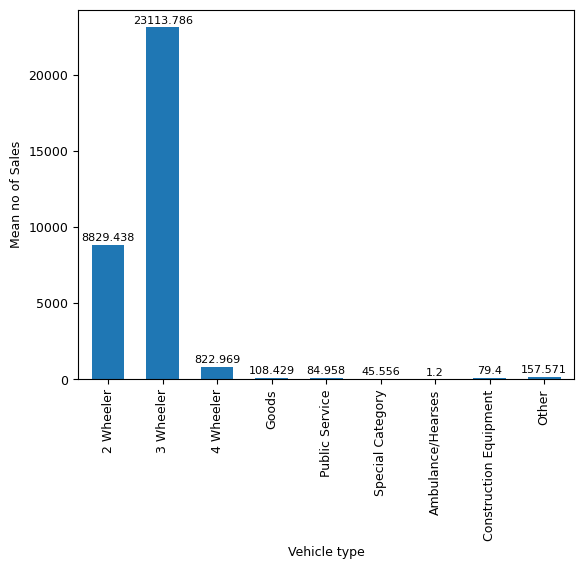

In [115]:
comparison=pd.DataFrame({'State':df['State'],'2 Wheeler':s2, '3 Wheeler':s3,'4 Wheeler':s4, 'Goods':s5,'Public Service':s6,'Special Category':s7,'Ambulance/Hearses':s8,'Construction Equipment':s9,'Other':s10})
comparison.set_index('State',inplace=True)
ax=round(comparison[['2 Wheeler','3 Wheeler','4 Wheeler','Goods','Public Service','Special Category','Ambulance/Hearses','Construction Equipment','Other']].mean(),3).plot.bar(width=0.6)
plt.ylabel('Mean no of Sales')
plt.xlabel('Vehicle type')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8, color='black')
plt.show()                       

In [116]:
df.isnull().sum()

State                              0
Two_Wheeler                        0
Three_Wheeler                      4
Four_Wheeler                       0
Goods_Vehicles                     4
Public_Service_Vehicle             8
Special_Category_Vehicles         23
Ambulance/Hearses                 27
Construction_Equipment_Vehicle    27
Other                              4
Grand_Total                        0
dtype: int64

In [117]:
s31=df['Three_Wheeler'].replace(np.NaN,df['Three_Wheeler'].median()).astype(int)
s51=df['Goods_Vehicles'].replace(np.NaN,df['Goods_Vehicles'].median()).astype(int)
s61=df['Public_Service_Vehicle'].replace(np.NaN,df['Public_Service_Vehicle'].median()).astype(int)
s71=df['Special_Category_Vehicles'].replace(np.NaN,df['Special_Category_Vehicles'].median()).astype(int)
s81=df['Ambulance/Hearses'].replace(np.NaN,df['Ambulance/Hearses'].median()).astype(int)
s91=df['Construction_Equipment_Vehicle'].replace(np.NaN,df['Construction_Equipment_Vehicle'].median()).astype(int)
s101=df['Other'].replace(np.NaN,df['Other'].median()).astype(int)

C:\Users\Ayaan\AppData\Local\Temp\ipykernel_19236\316125346.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=13)


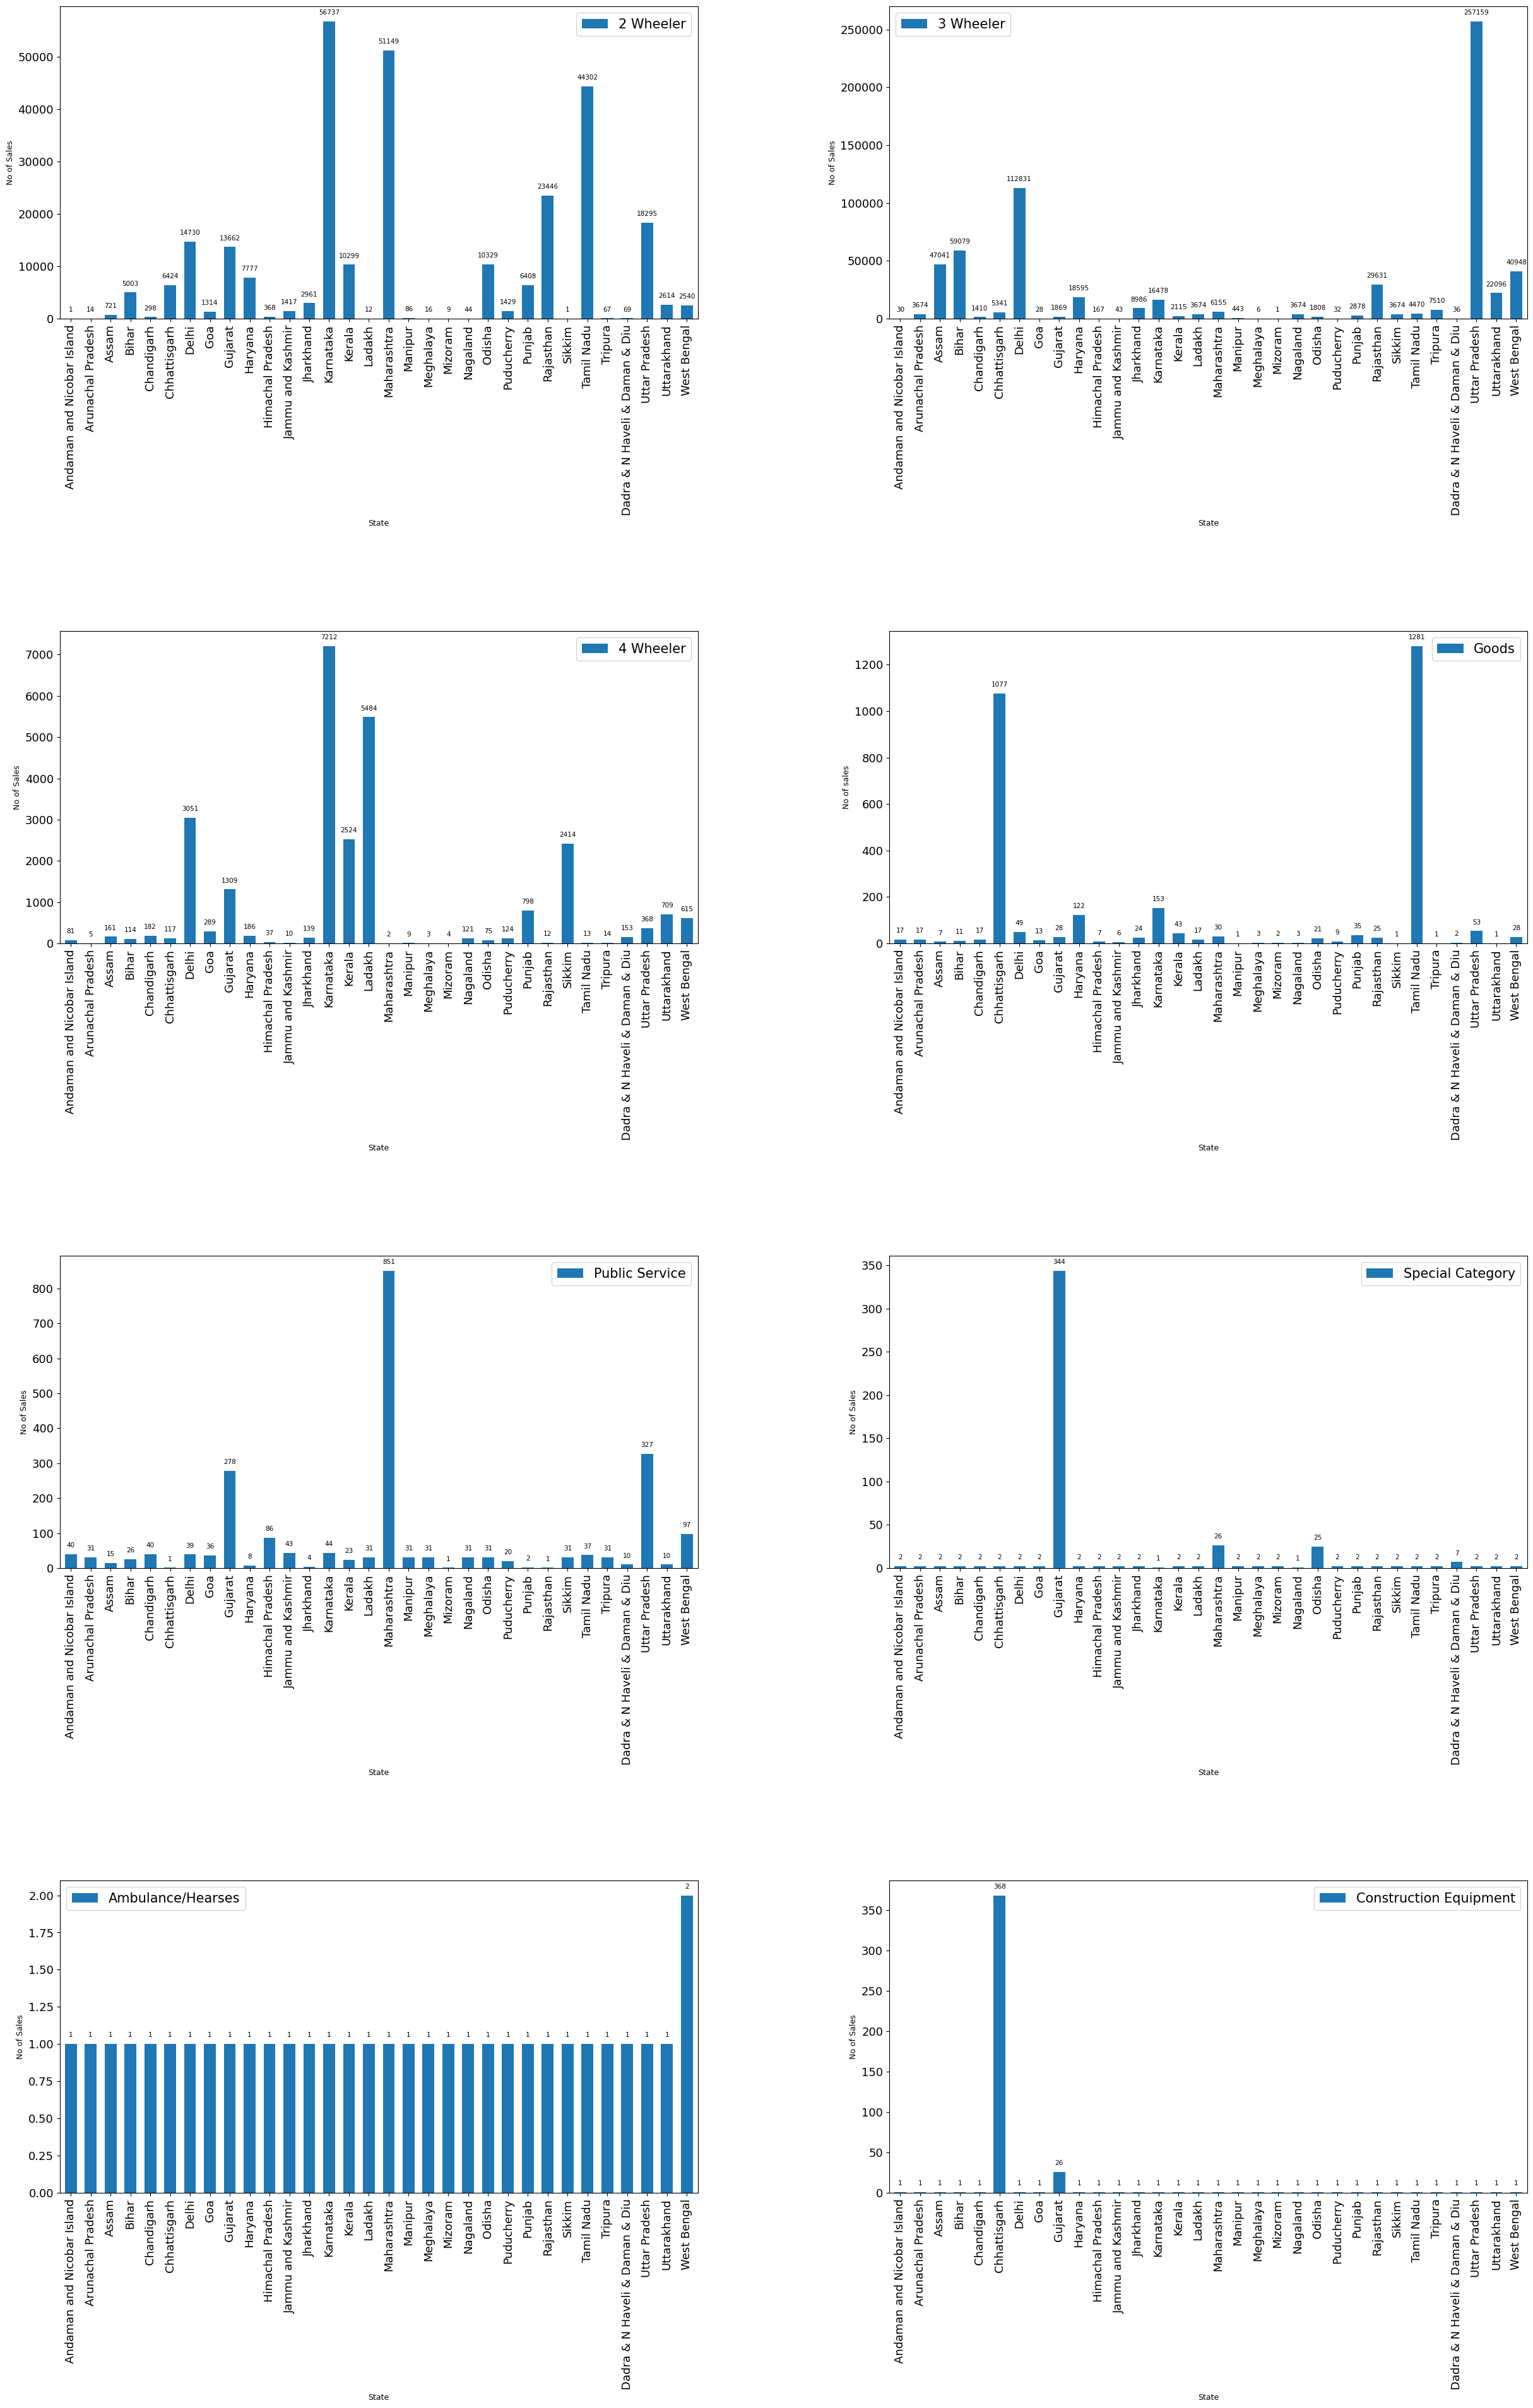

In [118]:
comparison=pd.DataFrame({'State':df['State'],'2 Wheeler':s2, '3 Wheeler':s31,'4 Wheeler':s4, 'Goods':s51,'Public Service':s61,'Special Category':s71,'Ambulance/Hearses':s81,'Construction Equipment':s91,'Other':s101})
comparison.set_index('State', inplace=True)
fig,axes=plt.subplots(nrows=4,ncols=2,figsize=(30,45))
plt.subplots_adjust(hspace=1,wspace=0.3)
plt.rcParams.update({'font.size':15})

comparison[['2 Wheeler']].plot.bar(ax=axes[0,0],width=0.6)
axes[0,0].set_ylabel('No of Sales')

comparison[['3 Wheeler']].plot.bar(ax=axes[0,1],width=0.6)
axes[0,1].set_ylabel('No of Sales')

comparison[['4 Wheeler']].plot.bar(ax=axes[1,0],width=0.6)
# axes[1,0].set_xlabel('State')
axes[1,0].set_ylabel('No of Sales')

comparison[['Goods']].plot.bar(ax=axes[1,1],width=0.6)
# axes[1,1].set_xlabel('State')
axes[1,1].set_ylabel('No of sales')

comparison[['Public Service']].plot.bar(ax=axes[2,0],width=0.6)
# axes[2,0].set_xlabel('State')
axes[2,0].set_ylabel('No of Sales')

comparison[['Special Category']].plot.bar(ax=axes[2,1],width=0.6)
# axes[2,1].set_xlabel('State')
axes[2,1].set_ylabel('No of Sales')

comparison[['Ambulance/Hearses']].plot.bar(ax=axes[3,0],width=0.6)
# axes[3,0].set_xlabel('State')
axes[3,0].set_ylabel('No of Sales')

comparison[['Construction Equipment']].plot.bar(ax=axes[3,1],width=0.6)
# axes[3,1].set_xlabel('State')
axes[3,1].set_ylabel('No of Sales')


for ax in axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=13)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=13)

# for i in range(len(df['State'])):
#     plt.text(i,comparison[['2 Wheeler']],comparison[['2 Wheeler']])

for ax in axes.flatten():
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=7.5, color='black')

     


    
plt.show()

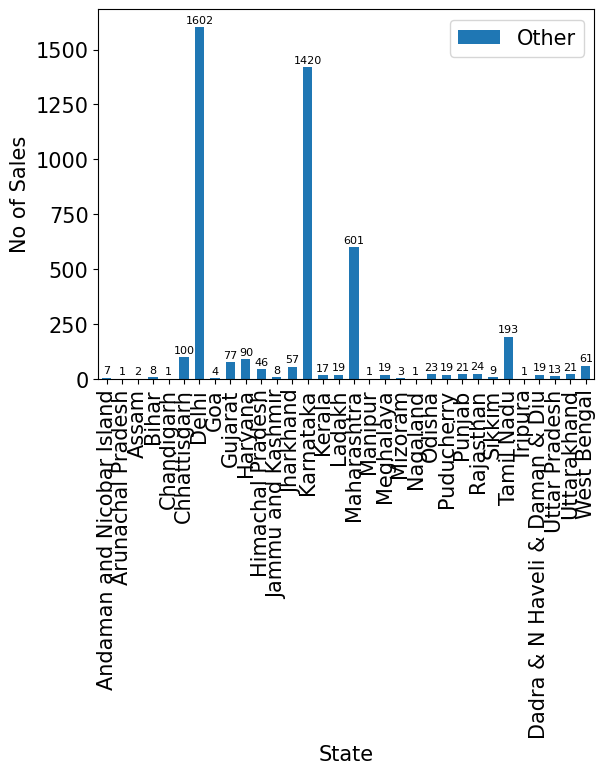

In [119]:
comparison=pd.DataFrame({'State':df['State'],'Other':s101})
comparison.set_index('State',inplace=True)
ax=comparison[['Other']].plot.bar(width=0.6)
plt.ylabel('No of Sales')
plt.xlabel('State')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8, color='black')
plt.show()

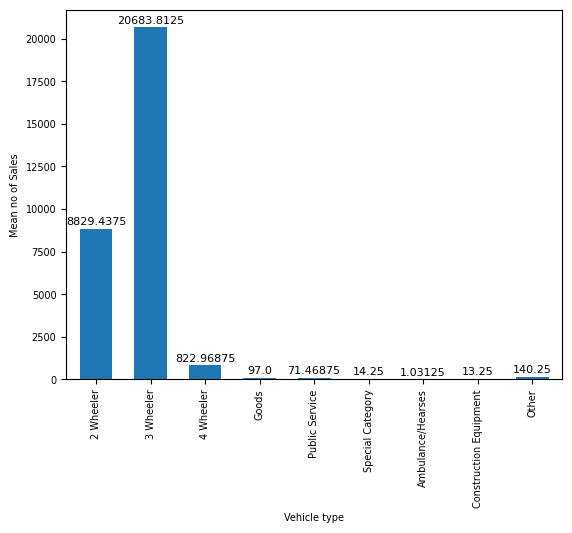

In [120]:
comparison=pd.DataFrame({'State':df['State'],'2 Wheeler':s2, '3 Wheeler':s31,'4 Wheeler':s4, 'Goods':s51,'Public Service':s61,'Special Category':s71,'Ambulance/Hearses':s81,'Construction Equipment':s91,'Other':s101})
comparison.set_index('State',inplace=True)
plt.rcParams.update({'font.size':7})
ax=comparison[['2 Wheeler','3 Wheeler','4 Wheeler','Goods','Public Service','Special Category','Ambulance/Hearses','Construction Equipment','Other']].mean().plot.bar(width=0.6)
plt.ylabel('Mean no of Sales')
plt.xlabel('Vehicle type')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8, color='black')
plt.show()                       

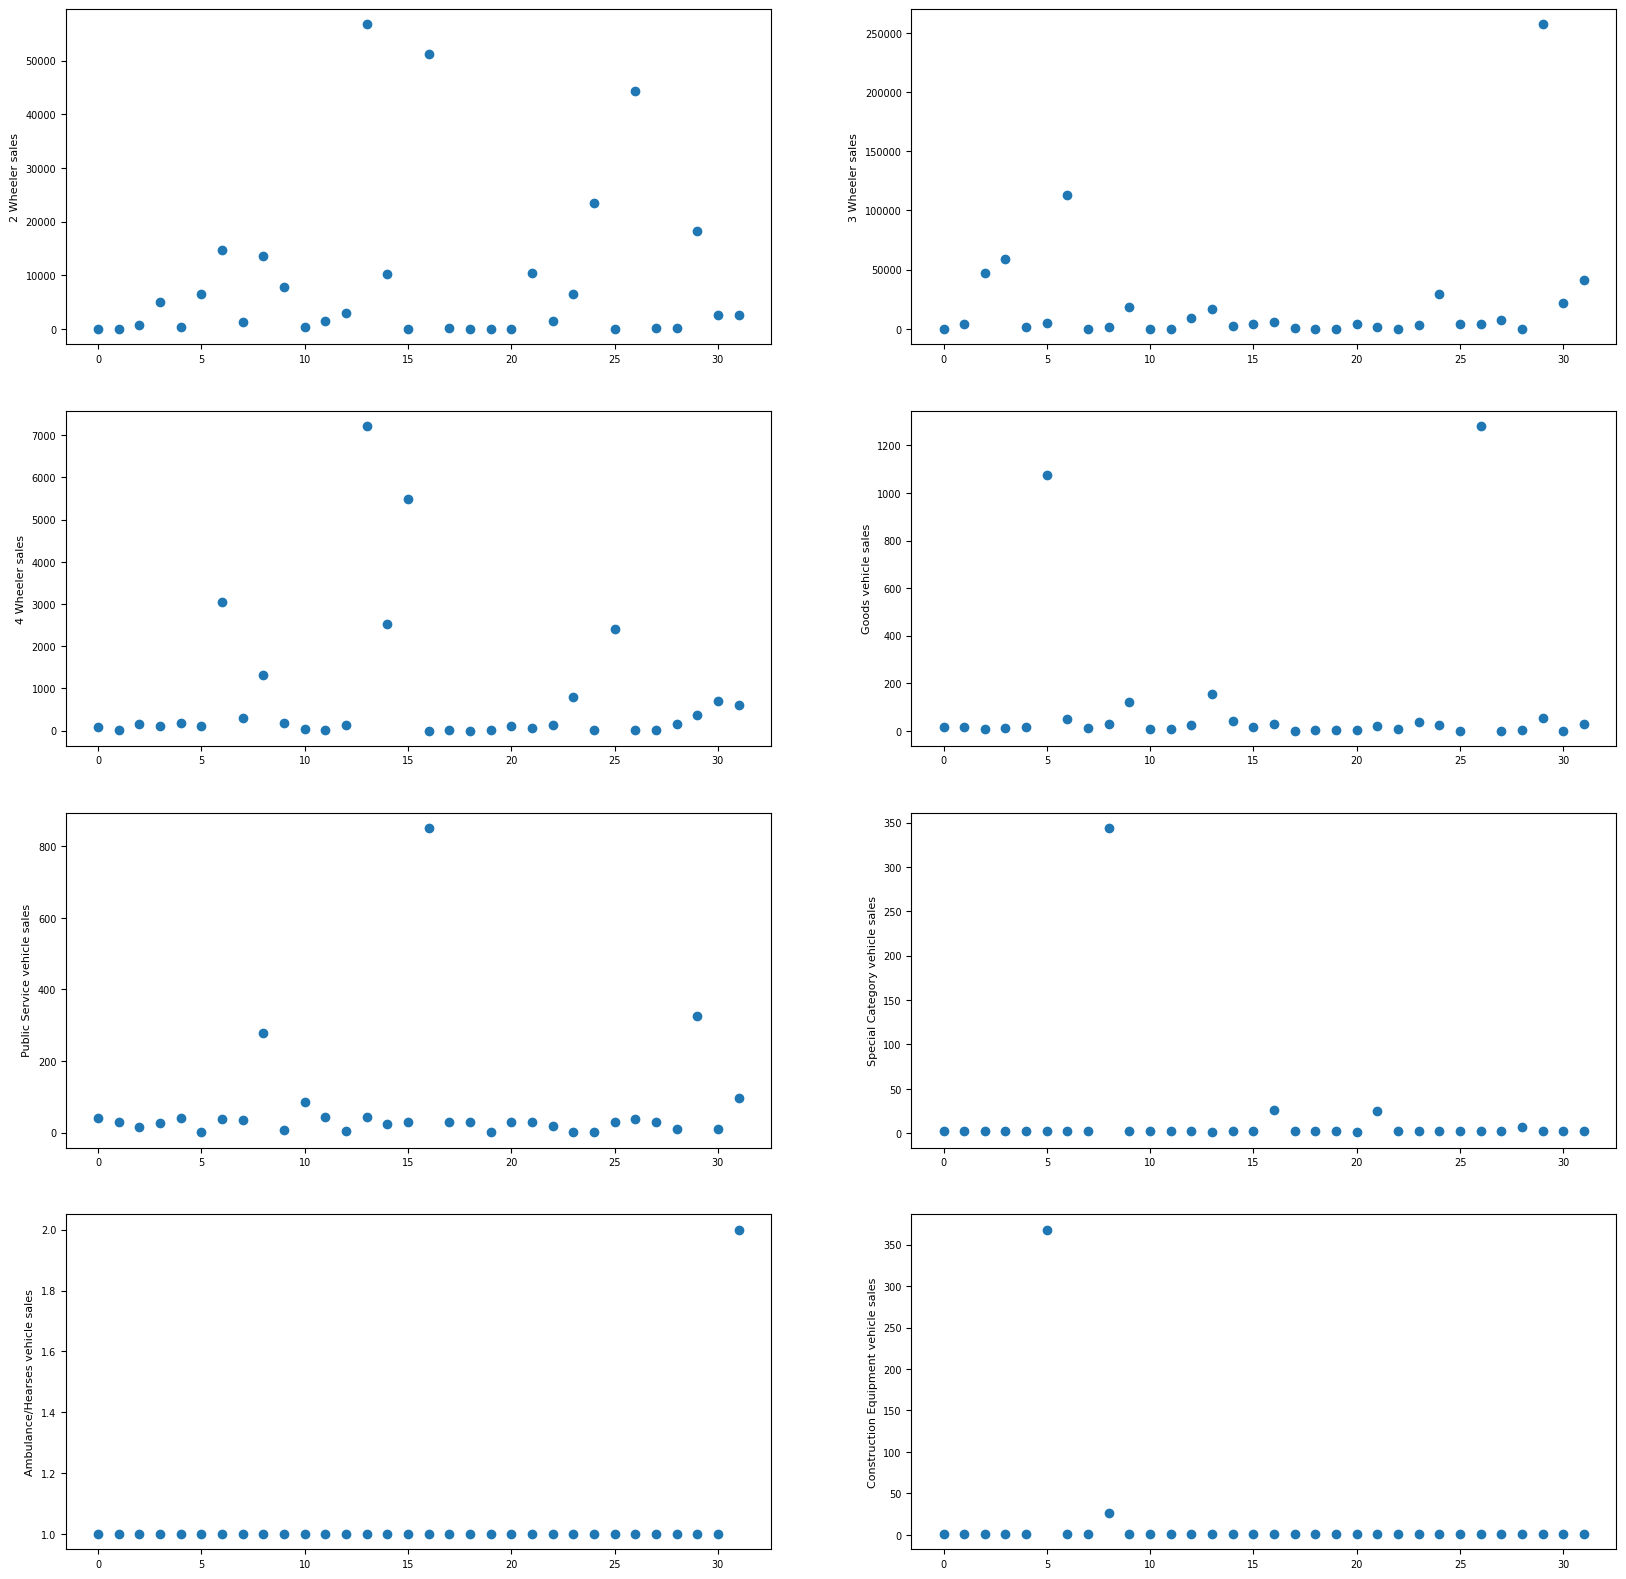

In [121]:
f,axes=plt.subplots(nrows=4,ncols=2,figsize=(20,20))
axes[0,0].scatter(df.index,s2)
axes[0,0].set_ylabel('2 Wheeler sales',fontsize=8)
axes[0,1].scatter(df.index,s31)
axes[0,1].set_ylabel('3 Wheeler sales',fontsize=8)
axes[1,0].scatter(df.index,s4)
axes[1,0].set_ylabel('4 Wheeler sales',fontsize=8)
axes[1,1].scatter(df.index,s51)
axes[1,1].set_ylabel('Goods vehicle sales',fontsize=8)
axes[2,0].scatter(df.index,s61)
axes[2,0].set_ylabel('Public Service vehicle sales',fontsize=8)
axes[2,1].scatter(df.index,s71)
axes[2,1].set_ylabel('Special Category vehicle sales',fontsize=8)
axes[3,0].scatter(df.index,s81)
axes[3,0].set_ylabel('Ambulance/Hearses vehicle sales',fontsize=8)
axes[3,1].scatter(df.index,s91)
axes[3,1].set_ylabel('Construction Equipment vehicle sales',fontsize=8)
# plt.scatter(comparison.index,s101)
# plt.xlabel('Other vehicle sales',fontsize=6)
plt.show()

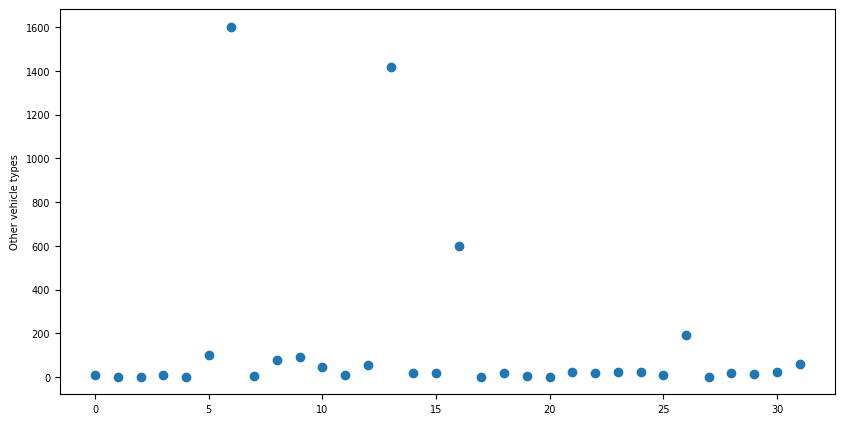

In [122]:
f,axes=plt.subplots(figsize=(10,5))
plt.scatter(df.index,s101)
plt.ylabel('Other vehicle types')
plt.show()

In [123]:
df1=pd.read_csv('age grps.csv')
df1.head()

,Age group,Percentage of Electric vehicle ownership
0,< 25,4.5
1,25-34,6.2
2,35-44,6.7
3,45-54,5.2
4,55-64,3.4


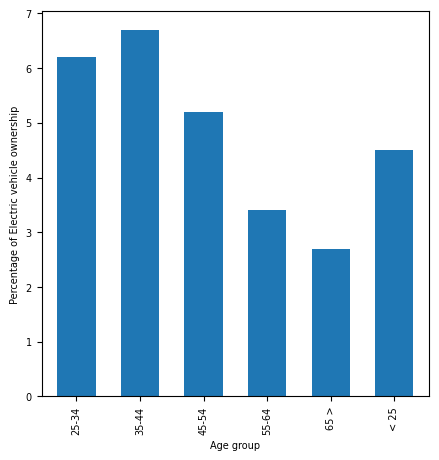

In [124]:
f,ax=plt.subplots(figsize=(5,5))
df1.groupby('Age group')['Percentage of Electric vehicle ownership'].mean().plot.bar(width=0.6)
plt.ylabel('Percentage of Electric vehicle ownership')
plt.show()

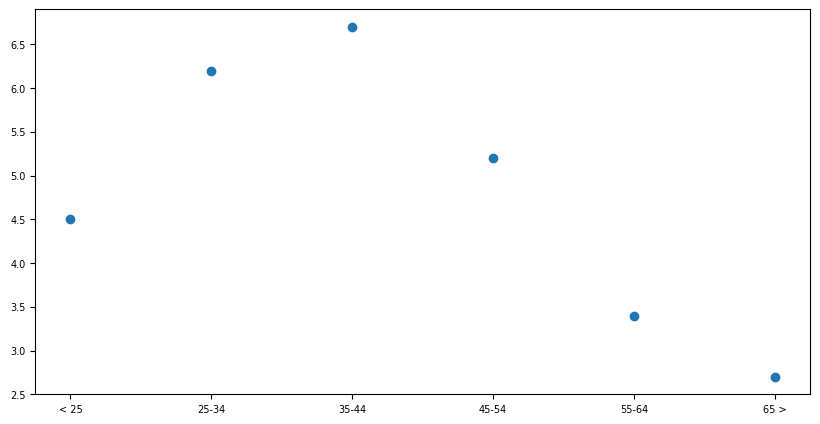

In [125]:
f,axes=plt.subplots(figsize=(10,5))
plt.scatter(df1['Age group'],df1['Percentage of Electric vehicle ownership'])
plt.show()

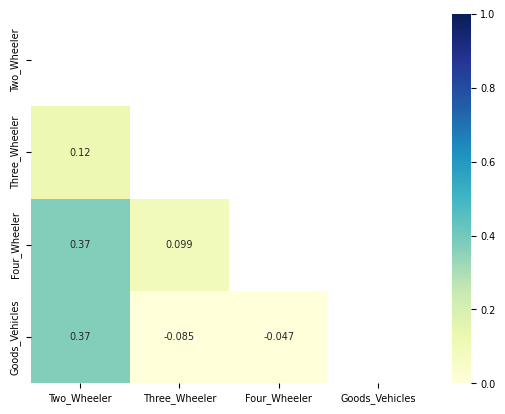

In [126]:
f1=['Two_Wheeler','Three_Wheeler','Four_Wheeler','Goods_Vehicles']
mask = np.triu(np.ones_like(df[f1].corr()))
dataplot = sns.heatmap(df[f1].corr(), vmin=0, vmax=1, cmap="YlGnBu",
annot=True, mask=mask)
plt.show()

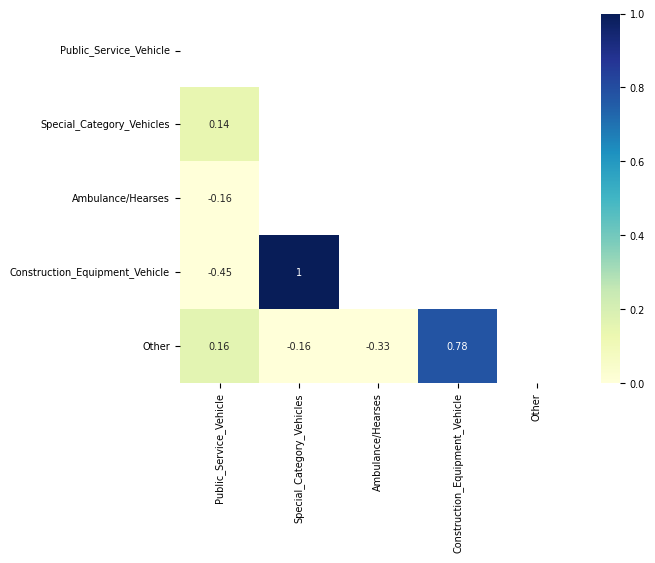

In [127]:
f2=['Public_Service_Vehicle','Special_Category_Vehicles','Ambulance/Hearses','Construction_Equipment_Vehicle','Other']
mask = np.triu(np.ones_like(df[f2].corr()))
dataplot = sns.heatmap(df[f2].corr(), vmin=0, vmax=1, cmap="YlGnBu",
annot=True, mask=mask)
plt.show()

In [128]:
df2=pd.read_csv('pop_dist.csv')
df2.head()

,Sl.No.,States/Uts,0-4,`5-9,`10-14,15-19,20-24,25-29,30-34,35-39,...,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+,Age not stated
0,1,Andhra Pradesh,7.4,8.6,9.7,9.6,9.6,9.2,7.8,7.7,...,3.8,2.6,1.8,0.8,0.5,0.2,0.1,0.0,0.0,0.9
1,2,Arunachal Pradesh,10.3,12.4,13.0,11.3,9.5,8.9,7.3,6.8,...,1.8,1.1,0.8,0.4,0.3,0.1,0.1,0.0,0.0,0.1
2,3,Assam,10.3,11.4,11.2,9.8,9.3,9.0,7.5,7.2,...,2.5,1.6,1.2,0.6,0.4,0.1,0.1,0.1,0.0,0.1
3,4,Bihar,12.3,14.4,13.4,9.1,7.7,7.4,6.8,6.2,...,2.9,2.0,1.3,0.5,0.4,0.1,0.1,0.0,0.0,0.4
4,5,Chhattisgarh,9.9,10.8,11.3,10.2,9.4,8.1,7.1,7.0,...,2.9,2.1,1.5,0.7,0.4,0.1,0.1,0.0,0.0,0.1


Text(0, 0.5, '35-39')

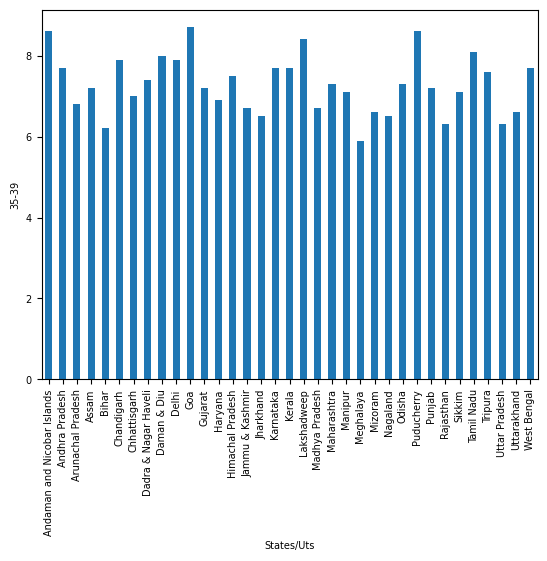

In [129]:
upper_limit = df2['35-39'].mean() + 3*df2['35-39'].std()
lower_limit = df2['35-39'].mean() - 3*df2['35-39'].std()
df2['35-39'] = np.where(
df2['35-39']>upper_limit, upper_limit,
np.where(
df2['35-39']<lower_limit,
lower_limit,
df2['35-39']))

df2.groupby('States/Uts')['35-39'].mean().plot.bar()
plt.ylabel('35-39')

Text(0, 0.5, '40-44')

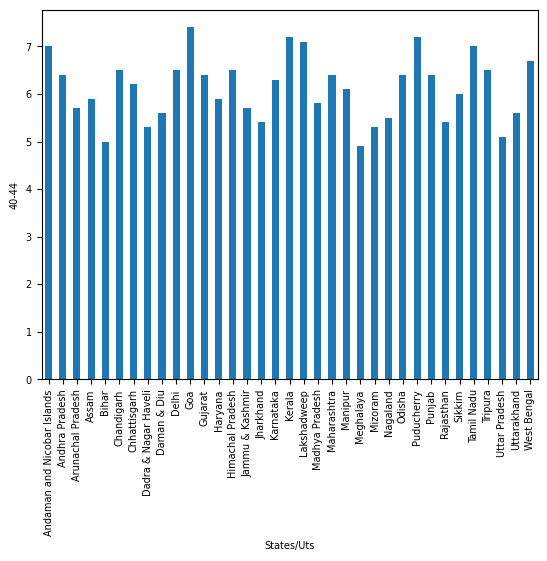

In [130]:
upper_limit = df2['40-44'].mean() + 3*df2['40-44'].std()
lower_limit = df2['40-44'].mean() - 3*df2['40-44'].std()
df2['40-44'] = np.where(
df2['40-44']>upper_limit, upper_limit,
np.where(
df2['40-44']<lower_limit,
lower_limit,
df2['40-44']))

df2.groupby('States/Uts')['40-44'].mean().plot.bar()
plt.ylabel('40-44')

C:\Users\Ayaan\AppData\Local\Temp\ipykernel_19236\505267355.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2.groupby('States/Uts')['35-39','40-44'].mean().plot.bar()


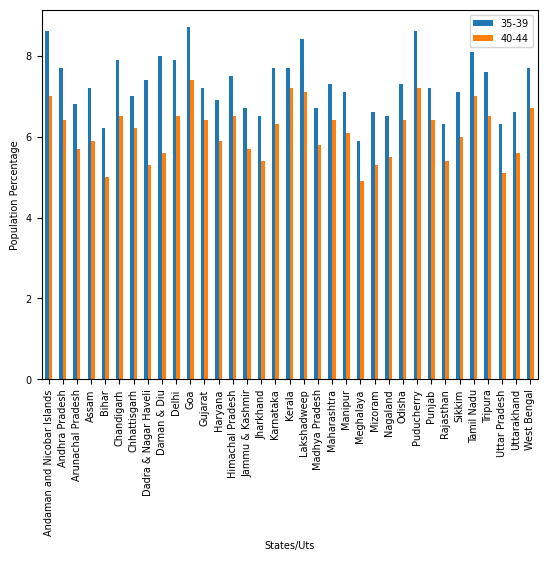

In [131]:
df2.groupby('States/Uts')['35-39','40-44'].mean().plot.bar()
plt.ylabel('Population Percentage')
plt.show()

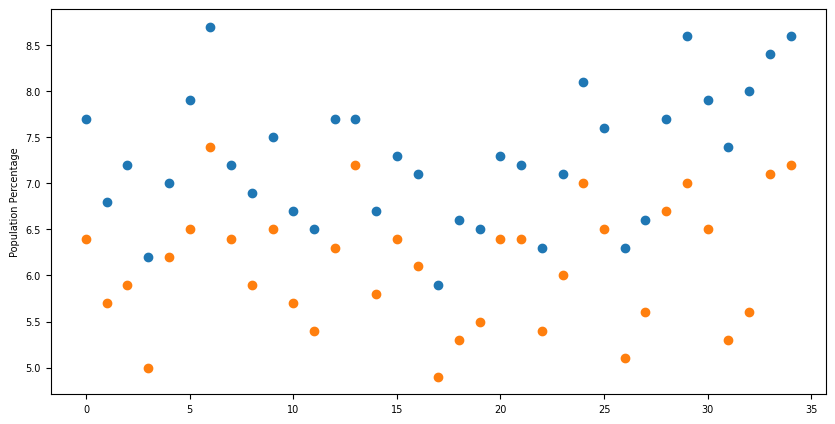

In [132]:
f,axes=plt.subplots(figsize=(10,5))
plt.scatter(df2.index,df2['35-39'])
plt.scatter(df2.index,df2['40-44'])
plt.ylabel('Population Percentage')
plt.show()

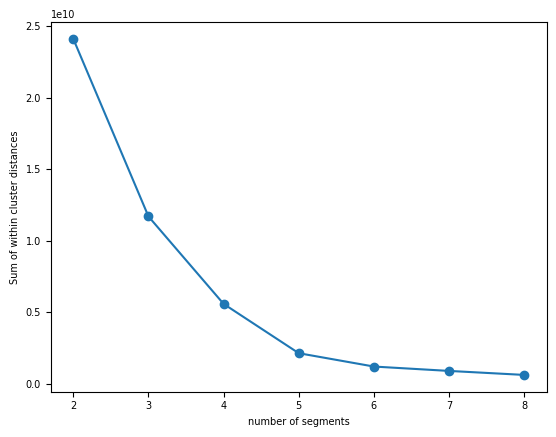

In [133]:
from sklearn.cluster import KMeans
np.random.seed(1234)
MD_kms = []
for i in range(2, 9):
    km = KMeans(n_clusters=i, n_init=10, random_state=3)
    km.fit(comparison)
    MD_kms.append(km)

plt.figure()
plt.plot(range(2, 9), [k.inertia_ for k in MD_kms], marker='o')
plt.xlabel('number of segments')
plt.ylabel('Sum of within cluster distances')
plt.show()

In [149]:
df3=pd.read_csv('cha.csv')
df3.head()

,State/UT,No. of Electric Vehicle (EV) Chargers Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,281
3,Gujarat,278
4,Uttar Pradesh,207


In [163]:
df3.drop(df3[df3['State/UT']=='Total'].index,inplace=True)


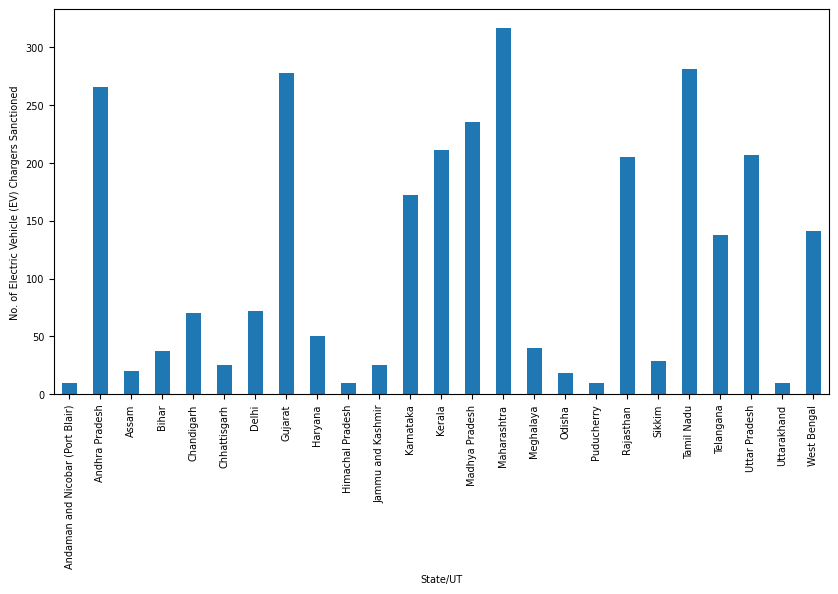

In [164]:
f,axes=plt.subplots(figsize=(10,5))
df3.groupby('State/UT')['No. of Electric Vehicle (EV) Chargers Sanctioned'].mean().plot.bar()
plt.ylabel('No. of Electric Vehicle (EV) Chargers Sanctioned')
plt.show()

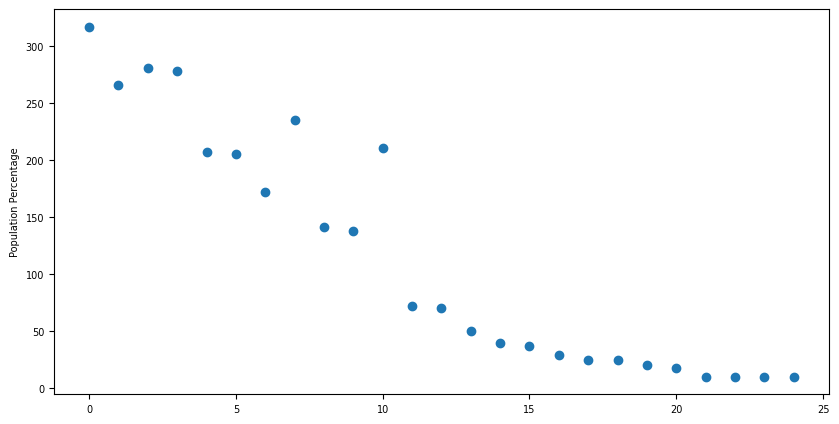

In [165]:
f,axes=plt.subplots(figsize=(10,5))
plt.scatter(df3.index,df3['No. of Electric Vehicle (EV) Chargers Sanctioned'])
plt.ylabel('Population Percentage')
plt.show()